# Limits of Diversification

incl the anatomy of a cap-weighted portfolio, and a bunch of cool Pandas stuff along the way

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk
import numpy as np
import pandas as pd

In [3]:
ind_return = erk.get_ind_returns()
ind_nfirms = erk.get_ind_nfirms()
ind_size = erk.get_ind_size()

In [4]:
ind_return.shape

(1110, 30)

In [5]:
ind_nfirms.shape

(1110, 30)

In [6]:
ind_size.shape

(1110, 30)

In [7]:
ind_mktcap = ind_nfirms * ind_size
ind_mktcap.shape

(1110, 30)

In [8]:
ind_mktcap.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,1547.14,21.36,955.52,184.87,24.04,178.16,220.32,178.64,979.03,80.34,...,1751.80,40.80,396.90,212.10,4951.34,2.38,1539.45,64.92,225.96,97.00
1926-08,1552.30,20.25,967.52,190.19,26.66,177.04,237.96,180.60,1056.21,80.60,...,1766.35,44.25,404.18,227.16,5031.26,1.80,1536.81,66.00,226.56,102.04
1926-09,1591.00,25.74,1024.48,191.10,29.34,169.44,231.48,187.11,1114.01,87.23,...,1804.80,45.15,417.27,220.92,5255.48,1.90,1521.63,65.64,236.04,108.84
1926-10,1597.02,26.76,1030.72,201.32,28.84,169.84,228.36,188.09,1163.99,88.66,...,1820.80,45.90,416.64,208.62,5241.42,1.76,1522.95,64.80,232.32,104.64
1926-11,1542.84,25.86,1041.28,191.66,31.58,161.12,228.36,185.78,1106.02,88.92,...,1818.70,44.67,411.18,196.80,5087.50,1.48,1485.99,61.98,220.20,95.76


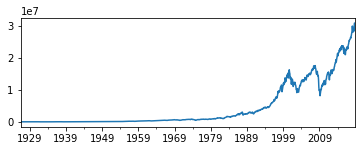

In [9]:
total_mktcap = ind_mktcap.sum(axis='columns')
total_mktcap.plot(figsize=(6,2))

In [10]:
ind_capweight = ind_mktcap.divide(total_mktcap, axis='rows')

In [11]:
ind_capweight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


In [12]:
ind_capweight['1926'].sum(axis='columns')

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

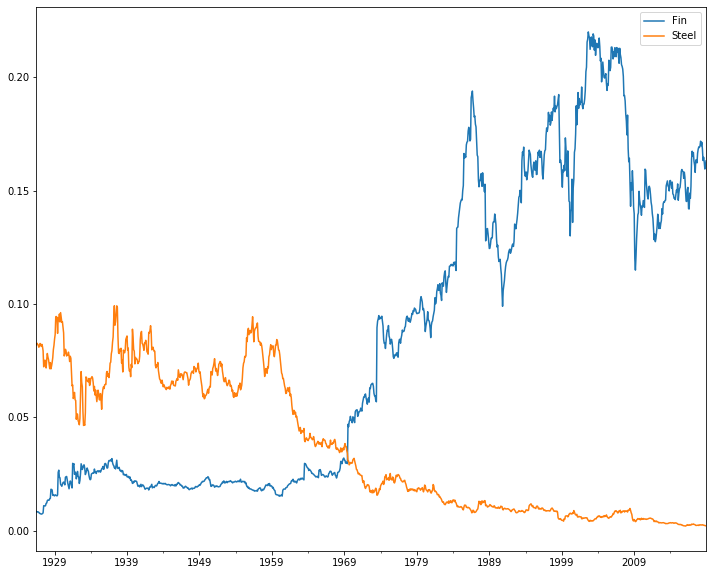

In [13]:
ind_capweight[['Fin', 'Steel']].plot(figsize=(12,10))

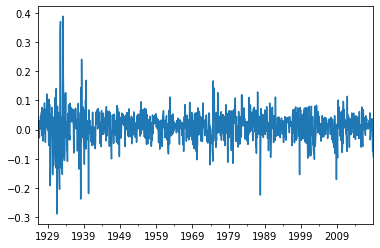

In [14]:
total_market_return = (ind_capweight * ind_return).sum(axis='columns')
total_market_return.plot()

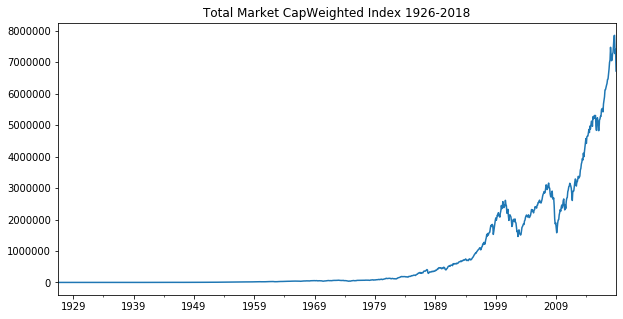

In [15]:
total_market_index = erk.drawdown(total_market_return).Wealth #wealth index
total_market_index.plot(figsize=(10,5),title='Total Market CapWeighted Index 1926-2018')

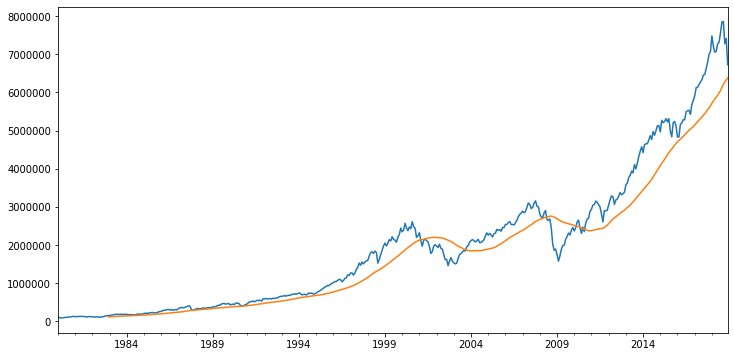

In [16]:
total_market_index['1980':].plot(figsize=(12,6))
total_market_index['1980':].rolling(window=36).mean().plot()

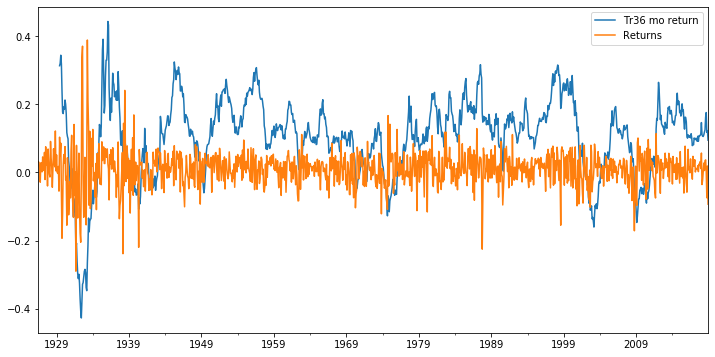

In [17]:
tmi_tr36rets = total_market_return.rolling(window=36).aggregate(erk.annualize_rets, periods_per_year=12) 
#aggregate is applied on each window and we want to compound them
tmi_tr36rets.plot(figsize=(12,6),label='Tr36 mo return', legend=True)
total_market_return.plot(label='Returns', legend=True)

### Rolling Correlation - along with MultiIndexes and .groupby

In [18]:
tsr_corr = ind_return.rolling(window=36).corr()
tsr_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [19]:
tsr_corr.index.names = ['date', 'industry']
tsr_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
date    industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

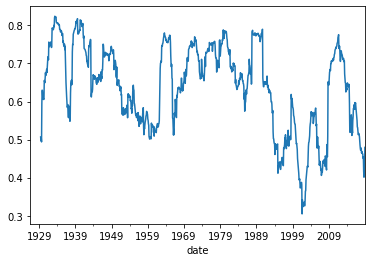

In [20]:
ind_tr36corr = tsr_corr.groupby(level='date').apply(lambda corrmat: corrmat.values.mean())
ind_tr36corr.plot()

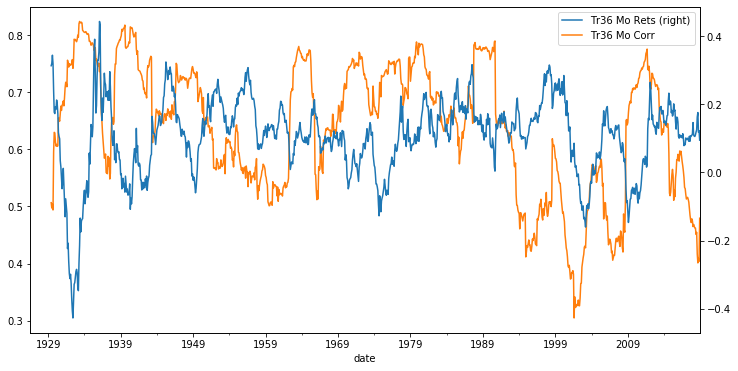

In [21]:
tmi_tr36rets.plot(label='Tr36 Mo Rets', figsize=(12,6), legend=True, secondary_y=True)
ind_tr36corr.plot(label='Tr36 Mo Corr', legend=True)

In [22]:
tmi_tr36rets.corr(ind_tr36corr) #correlation between the average correlation of industries returns

-0.28010065062884126

# Implementing Portfolio Insurance (CPPI) and Drawdown Constrains

In [23]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
ind_return = erk.get_ind_returns()
tmi_return = erk.get_total_market_index_returns()

In [25]:
risky_r = ind_return['2000':][['Steel','Fin','Beer']]
# safe asset

In [26]:
risky_r.shape

(228, 3)

In [27]:
safe_r = pd.DataFrame().reindex_like(risky_r)

In [28]:
safe_r.shape

(228, 3)

In [29]:
safe_r[:]=0.03/12
start = 1000
floor = 0.8
safe_r

,Steel,Fin,Beer
2000-01,0.0025,0.0025,0.0025
2000-02,0.0025,0.0025,0.0025
2000-03,0.0025,0.0025,0.0025
2000-04,0.0025,0.0025,0.0025
2000-05,0.0025,0.0025,0.0025
...,...,...,...
2018-08,0.0025,0.0025,0.0025
2018-09,0.0025,0.0025,0.0025
2018-10,0.0025,0.0025,0.0025
2018-11,0.0025,0.0025,0.0025


1. Cushion - (Asset Value minus Floor Value)
2. Compute an Allocation to Safe and Risky Assets --> m*risk budget
3. Recommend the Asset Value based on the returns

In [30]:
def compound1(r):
    return (1+r).prod()-1
def compound2(r):
    return np.expm1(np.log1p(r).sum()) #a loop!!

In [31]:
compound1(risky_r)

Steel   -0.051696
Fin      1.773937
Beer     3.361349
dtype: float64

In [32]:
compound2(risky_r)

Steel   -0.051696
Fin      1.773937
Beer     3.361349
dtype: float64

In [33]:
%timeit compound1(risky_r)

1.93 ms ± 257 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [34]:
%timeit compound2(risky_r)

689 µs ± 196 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Back to CPPI

In [35]:
dates = risky_r.index
n_steps = len(dates)
account_value = start
floor_value = start*floor
m = 3
account_history = pd.DataFrame().reindex_like(risky_r)
cushion_history = pd.DataFrame().reindex_like(risky_r)
risky_w_history = pd.DataFrame().reindex_like(risky_r)

for step in range(n_steps):
    cushion = (account_value - floor_value)/account_value
    risky_w = m*cushion
    risky_w = np.minimum(risky_w, 1)
    risky_w = np.maximum(risky_w, 0)
    safe_w = 1-risky_w
    risky_alloc = account_value*risky_w
    safe_alloc = account_value*safe_w
    ## update the account value for this time step
    account_value = risky_alloc*(1+risky_r.iloc[step]) + safe_alloc*(1+safe_r.iloc[step])
    # save the values so I can look at the history and plot it etc
    cushion_history.iloc[step] = cushion
    risky_w_history.iloc[step] = risky_w
    account_history.iloc[step] = account_value

In [36]:
account_history.head()

,Steel,Fin,Beer
2000-01,984.380000,974.480000,987.320000
2000-02,1023.292876,931.167544,922.971256
2000-03,1047.555176,998.187296,924.835988
2000-04,1042.079009,973.927479,939.993701
2000-05,1007.137753,1001.460033,991.145489


In [37]:
risky_wealth = start*(1+risky_r).cumprod()

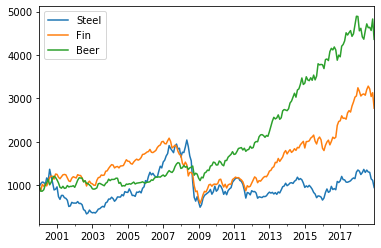

In [38]:
risky_wealth.plot()

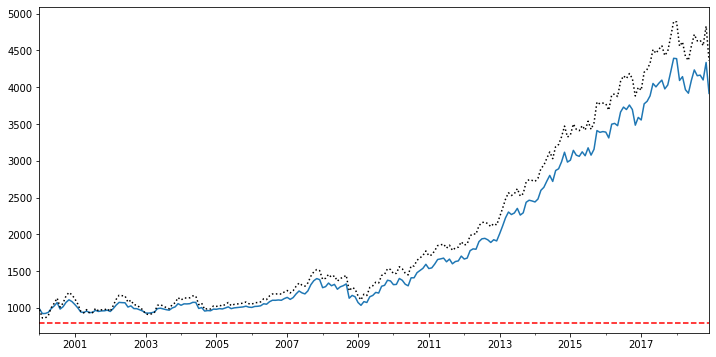

In [39]:
ax = account_history['Beer'].plot(figsize=(12,6))
risky_wealth['Beer'].plot(ax=ax, style='k:')
ax.axhline(y=floor_value, color='r', linestyle='--')

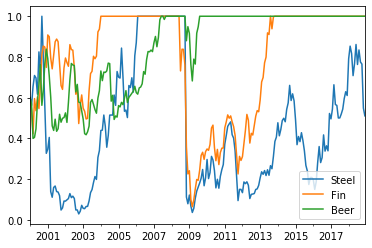

In [40]:
risky_w_history.plot()

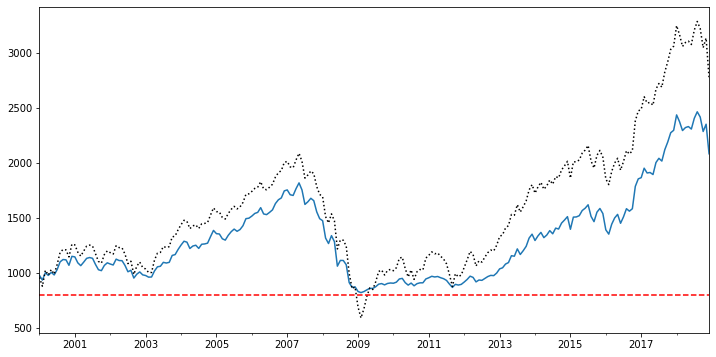

In [41]:
ind = 'Fin'
ax = account_history[ind].plot(figsize=(12,6))
risky_wealth[ind].plot(ax=ax, style='k:')
ax.axhline(y=floor_value, color='r', linestyle='--')
#blue line bounces back from red line because you have small investment at the time but upside potential is reduced as well

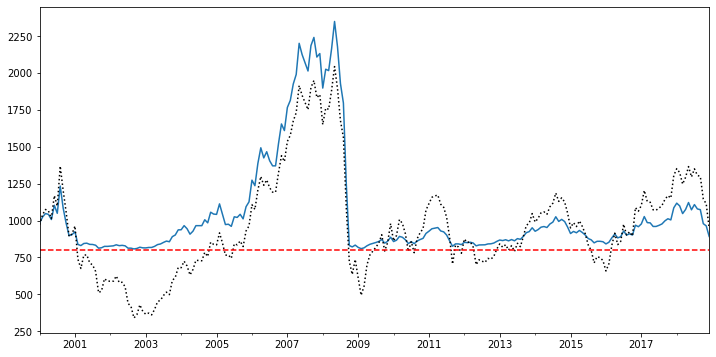

In [42]:
ind = 'Steel'
ax = account_history[ind].plot(figsize=(12,6))
risky_wealth[ind].plot(ax=ax, style='k:')
ax.axhline(y=floor_value, color='r', linestyle='--')

In [43]:
erk.summary_stats(risky_r)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher Var (5%),"Historic CVaR, (5%)",Sharpe Ratio,Max Drawdown
Steel,-0.002790,0.312368,-0.326334,4.144381,0.247424,0.208117,-0.102567,-0.758017
Fin,0.055166,0.192909,-0.533218,4.995534,0.164968,0.132175,0.126718,-0.718465
Beer,0.080598,0.138925,-0.493545,4.173881,0.107639,0.091442,0.354314,-0.271368


In [44]:
btr = erk.run_cppi(risky_r)
erk.summary_stats(btr['Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher Var (5%),"Historic CVaR, (5%)",Sharpe Ratio,Max Drawdown
Steel,-0.005167,0.174180,-1.995143,17.110190,0.279717,0.130153,-0.196750,-0.655198
Fin,0.040894,0.131678,-0.946504,6.051414,0.124820,0.091621,0.080352,-0.549673
Beer,0.075544,0.115462,-0.669250,4.760879,0.095174,0.074908,0.383772,-0.259582


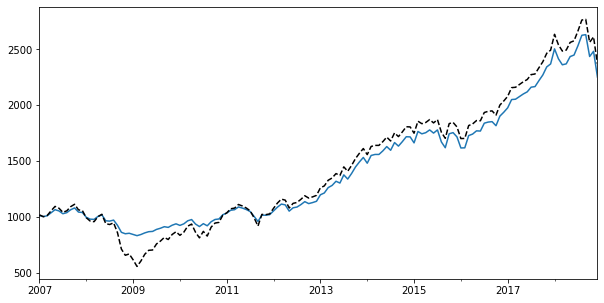

In [45]:
btr = erk.run_cppi(tmi_return['2007':])
ax = btr['Wealth'].plot(figsize=(10,5), legend=False)
btr['Risky Wealth'].plot(ax=ax, style='k--',legend=False)

In [46]:
erk.summary_stats(btr['Risky Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher Var (5%),"Historic CVaR, (5%)",Sharpe Ratio,Max Drawdown
R,0.073411,0.150463,-0.734939,4.523488,0.123824,0.096315,0.280618,-0.499943


In [47]:
erk.summary_stats(btr['Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher Var (5%),"Historic CVaR, (5%)",Sharpe Ratio,Max Drawdown
R,0.069416,0.100381,-0.588292,3.740932,0.07488,0.062953,0.382052,-0.229683


# Drawdown Constraint

In [48]:
btr = erk.run_cppi(ind_return['2007':][['Steel', 'Fin', 'Beer']], drawdown = 0.25)

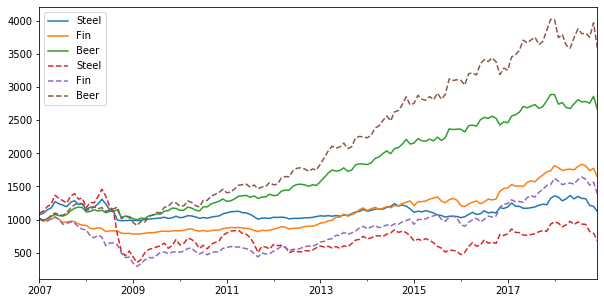

In [49]:
ax = btr['Wealth'].plot(figsize=(10,5))
btr['Risky Wealth'].plot(ax=ax, style='--')

In [50]:
erk.summary_stats(btr['Risky Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher Var (5%),"Historic CVaR, (5%)",Sharpe Ratio,Max Drawdown
Steel,-0.039660,0.306407,-0.459951,4.782828,0.263885,0.203837,-0.221642,-0.758017
Fin,0.027364,0.212204,-0.695200,4.621401,0.181074,0.149862,-0.012370,-0.718465
Beer,0.111554,0.127971,-0.670797,4.650878,0.102235,0.077388,0.620132,-0.271368


In [51]:
erk.summary_stats(btr['Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher Var (5%),"Historic CVaR, (5%)",Sharpe Ratio,Max Drawdown
Steel,0.003784,0.097073,-0.441089,5.220481,0.085762,0.066991,-0.262958,-0.248059
Fin,0.041975,0.085028,-0.355163,4.153860,0.064994,0.054111,0.136964,-0.243626
Beer,0.084375,0.086263,-0.744111,4.571533,0.068169,0.051189,0.613413,-0.161186


# Random Walk Generation

In [52]:
import pandas as pd
import numpy as np

def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    #to prices
    prices = s_0*(1+rets).cumprod()
    return prices

In [53]:
p = gbm(10, n_scenarios=3)

In [54]:
p.shape

(120, 3)

In [55]:
p.head()

,0,1,2
0,98.751085,96.555721,97.874518
1,90.762775,87.171502,91.491837
2,86.396637,87.019485,89.836156
3,85.396981,89.611326,92.698270
4,85.350158,93.282623,94.250822


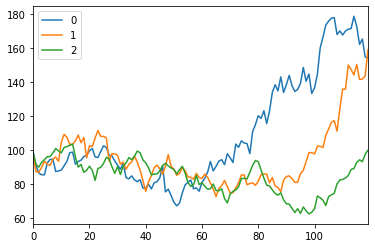

In [56]:
p.plot()

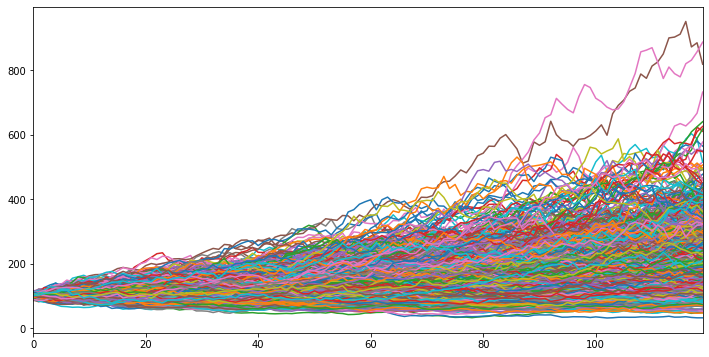

In [57]:
p = gbm(n_years=10, n_scenarios=1000).plot(figsize=(12,6), legend=False) #matplotlib is really slow

In [58]:
def gbm0(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    #to prices
    prices = s_0*(1+rets).cumprod()
    return prices

def gbm1(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt), scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios))
    #to prices
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [59]:
%timeit gbm0(n_years=5, n_scenarios=1000)

504 ms ± 29.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [60]:
%timeit gbm1(n_years=5, n_scenarios=1000)

256 ms ± 22.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


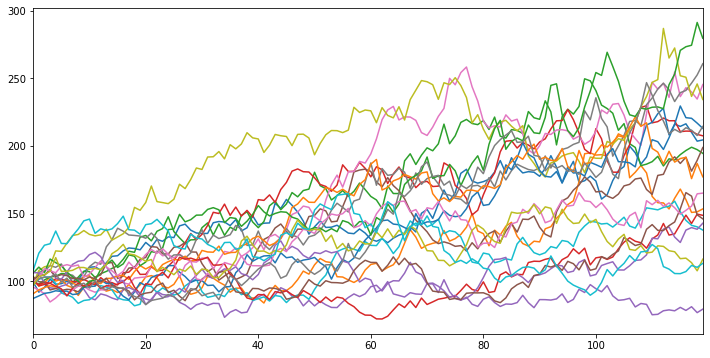

In [61]:
gbm(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))

In [62]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt), scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios))
    rets_plus_1[0] = 1
    #to prices
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

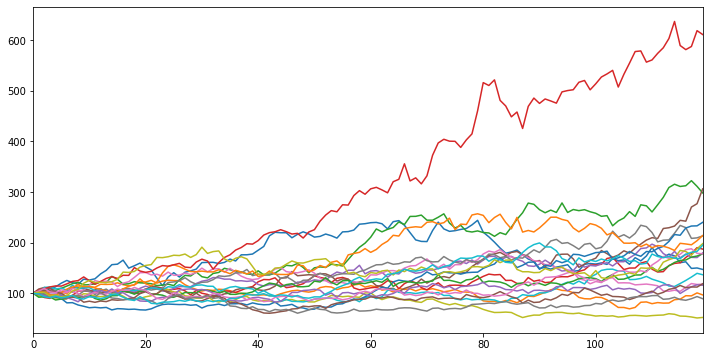

In [63]:
gbm(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))

In [64]:
gbm(n_scenarios=10).head()

,0,1,2,3,4,5,6,7,8,9
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,101.631773,110.066308,95.054958,104.722529,100.333503,101.868820,101.103570,104.474902,96.864236,94.819668
2,98.459853,110.888714,97.188130,114.610195,97.565767,108.328206,106.594894,111.643055,94.723347,93.728051
3,99.398358,107.648662,101.017433,119.061129,91.396751,108.478765,113.605022,108.881183,93.081179,93.445008
4,94.897504,101.036989,104.712364,115.793219,92.899167,107.181068,119.375454,108.532396,93.753663,97.954642


In [65]:
import ipywidgets as widgets
def sq(n):
    return n*n
sq(5)

25

In [66]:
widgets.interact(sq, n=(0,100))

interactive(children=(IntSlider(value=50, description='n'), Output()), _dom_classes=('widget-interact',))

<function __main__.sq(n)>

# Interactive Plotting and Monte Carlo Simulations of CPPI

In [67]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## GBM Interactive Plots

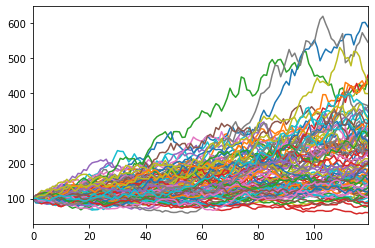

In [68]:
erk.gbm(10, 100).plot(legend=False)

In [69]:
def show_gbm(n_scenarios, mu, sigma):
    """
    Draw the results of a stock prices evolution under a Geometric Brownian Motion Model
    """
    s_0=100
    prices = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, s_0=s_0)
    ax = prices.plot(legend=False, color='indianred', alpha = 0.5, linewidth=2, figsize=(12,5))
    ax.axhline(y=s_0, ls=':', color='black')
    ax.set_ylim(top=400)
    # a draw a dot at the origin
    ax.plot(0, s_0, marker='o', color='darkred', alpha=0.2)

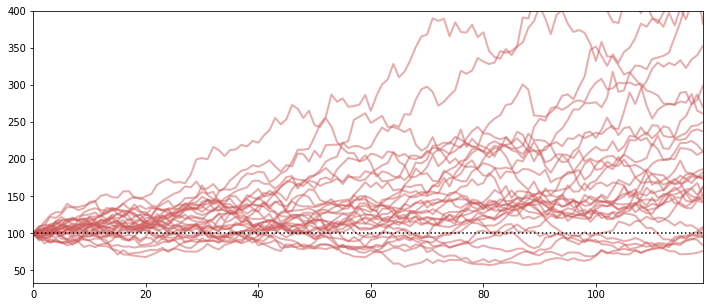

In [70]:
show_gbm(30, 0.07, 0.15)

In [71]:
gbm_controls = widgets.interactive(show_gbm,
                                   n_scenarios = (1, 20, 1),
                                  mu = (-.2, 0.2, 0.01),
                                  sigma = (0, .3, .01))

In [72]:
display(gbm_controls)

interactive(children=(IntSlider(value=10, description='n_scenarios', max=20, min=1), FloatSlider(value=0.0, de…

## Interactive CPPI Simulation - Monte Carlo

In [73]:
def show_cppi(n_scenarios=50, mu=0.7, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plotthe results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    # run the "back-test"
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr['Wealth']
    y_max=wealth.values.max()*y_max/100
    ax = wealth.plot(legend=False, alpha=0.3, color='indianred', figsize=(12,6))
    ax.axhline(y=start, ls=':', color='black')
    ax.axhline(y=start*floor, ls='--', color='red')
    ax.set_ylim(top=y_max)
    
cppi_controls = widgets.interactive(show_cppi,
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50), 
                                    mu=(0.,+.2,.01), 
                                    sigma=(0, .3, .01), 
                                    floor=(0, 2, .1), 
                                    m=(1, 5, .5),
                                    riskfree_rate=(0, .05, .01),
                                   y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                         description='Zoom Y axis'))
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [76]:
import matplotlib.pyplot as plt

In [79]:
def show_cppi(n_scenarios=50, mu=0.7, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plotthe results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    # run the "back-test"
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr['Wealth']
    # calculate the terminal value
    y_max=wealth.values.max()*y_max/100
    terminal_wealth = wealth.iloc[-1]
    # plot
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios':[3,2]}, figsize=(24,9))
    plt.subplots_adjust(wspace=0.0)
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color='indianred')
    wealth_ax.axhline(y=start, ls=':', color='black')
    wealth_ax.axhline(y=start*floor, ls='--', color='red')
    wealth_ax.set_ylim(top=y_max)
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=':', color='black')
    #ax = wealth.plot(legend=False, alpha=0.3, color='indianred', figsize=(12,6))
    #ax.axhline(y=start, ls=':', color='black')
    #ax.axhline(y=start*floor, ls='--', color='red')
    #ax.set_ylim(top=y_max)
    
cppi_controls = widgets.interactive(show_cppi,
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50), 
                                    mu=(0.,+.2,.01), 
                                    sigma=(0, .3, .01), 
                                    floor=(0, 2, .1), 
                                    m=(1, 5, .5),
                                    riskfree_rate=(0, .05, .01),
                                   y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                         description='Zoom Y axis'))
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [83]:
def show_cppi(n_scenarios=50, mu=0.7, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plotthe results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    # run the "back-test"
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr['Wealth']
    # calculate the terminal value
    y_max=wealth.values.max()*y_max/100
    terminal_wealth = wealth.iloc[-1]
    
    tw_mean = terminal_wealth.mean()
    tw_median= terminal_wealth.median()
    failure_mask = np.less(terminal_wealth, start*floor)
    n_failures = failure_mask.sum()
    p_fail = n_failures/n_scenarios
    
    e_shortfall = np.dot(terminal_wealth-start*floor, failure_mask)/n_failures if n_failures >0 else 0.0
    # plot
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios':[3,2]}, figsize=(24,9))
    plt.subplots_adjust(wspace=0.0)
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color='indianred')
    wealth_ax.axhline(y=start, ls=':', color='black')
    wealth_ax.axhline(y=start*floor, ls='--', color='red')
    wealth_ax.set_ylim(top=y_max)
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=':', color='black')
    hist_ax.axhline(y=tw_mean, ls=':', color='blue')
    hist_ax.axhline(y=tw_median, ls=':', color='purple')
    hist_ax.annotate(f"Mean: ${int(tw_mean)}",xy=(.7,.9),xycoords='axes fraction',fontsize=24)
    hist_ax.annotate(f"Median: ${int(tw_median)}",xy=(.7,.85),xycoords='axes fraction',fontsize=24)
    if (floor > 0.01):
        hist_ax.axhline(y=start*floor, ls='--', color='red', linewidth=3)
        hist_ax.annotate(f"Violations: {n_failures} ({p_fail*100:2.2f}%)\nE(shortfall)=${e_shortfall:2.2f}", xy=(.7, .7), xycoords='axes fraction', fontsize=24)
    
cppi_controls = widgets.interactive(show_cppi,
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50), 
                                    mu=(0.,+.2,.01), 
                                    sigma=(0, .3, .01), 
                                    floor=(0, 2, .1), 
                                    m=(1, 5, .5),
                                    riskfree_rate=(0, .05, .01),
                                   y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                         description='Zoom Y axis'))
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…